In [ ]:
pip install -r requirements.txt

In [1]:
# Data Analysis
import pandas as pd
import numpy as np

# Modeling
from gensim.models import Word2Vec
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from scipy import stats

# Additional
import math
import random
import pickle
from tqdm import tqdm

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

/home/hermann/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/hermann/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/home/hermann/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Constants
MDL_FOLDER = 'models/w2v/'
SRC_FOLDER = 'formatted/dataset/'
model_timestamp = '20241003_031421'

In [9]:
model = Word2Vec.load(MDL_FOLDER + 'w2v-trained-model-'+ model_timestamp +'.model')

In [6]:
dataset = pd.read_feather(SRC_FOLDER + 'dataframe.feather')
songs = dataset.copy()
songs.drop_duplicates(subset=['track_id'], inplace=True)
songs.set_index('track_id', inplace=True)
songs[songs['artist_name'] == 'queen']

,playlist_id,playlist_name,track_name,track_uri,pos,artist_id,artist_name,artist_uri
track_id,,,,,,,,
899,967010,ryan's playlist,bohemian rhapsody - remastered 2011,1AhDOtG9vPSOmsWgNW0BEY,67,449,queen,1dfeR4HaWDbWqFHLkxsg1d
900,967010,ryan's playlist,another one bites the dust - remastered 2011,5vdp5UmvTsnMEMESIF2Ym7,68,449,queen,1dfeR4HaWDbWqFHLkxsg1d
3252,967054,graduation party,crazy little thing called love - remastered 2011,6xdLJrVj4vIXwhuG8TMopk,77,449,queen,1dfeR4HaWDbWqFHLkxsg1d
5352,967082,trippin',fat bottomed girls,4igIYHF3B5VBxEafHauVo3,137,449,queen,1dfeR4HaWDbWqFHLkxsg1d
5860,967091,english,under pressure - remastered 2011,2fuCquhmrzHpu5xcA1ci9x,91,449,queen,1dfeR4HaWDbWqFHLkxsg1d
...,...,...,...,...,...,...,...,...
640930,56520,80's,radio ga ga - instrumental,4D71i0iyFv0xvPcITyuP9u,6,449,queen,1dfeR4HaWDbWqFHLkxsg1d
640931,56520,80's,i want it all - instrumental,18LSVgOcUPlvnlrntxRY69,7,449,queen,1dfeR4HaWDbWqFHLkxsg1d
656556,981365,anna,rock it prime jive - remastered 2011,4w09y5LHv5vJDZO4hWS846,91,449,queen,1dfeR4HaWDbWqFHLkxsg1d


# Vector Visualization

In [5]:
vocab = model.wv.index_to_key
for word in vocab:
    print(word)

2663
249
1372
270
443
6372
2306
6400
1697
229
1978
91
237
583
324
7135
327
3067
586
826
1214
3102
511
3061
1194
505
581
1591
9771
395
87
5209
636
5315
2173
5354
1111
243
6404
2168
584
756
502
7192
1901
4176
329
588
504
575
4165
8693
3017
832
2171
899
1592
233
573
6390
330
72
8746
589
2170
4724
2167
1736
341
294
2620
1207
468
92
1879
1208
483
824
509
508
579
6421
5324
3058
1107
1143
262
10182
4743
8996
5246
540
3045
6414
163
1908
2034
1203
6146
3216
1390
10187
491
435
1596
2467
4450
2172
1998
3076
6145
1983
1123
9837
993
6373
2161
796
247
1253
230
231
110
2298
8429
650
8797
1907
486
5991
570
1625
2309
6010
279
7077
4952
794
139
9964
3090
8904
6409
6370
3051
7367
6742
6392
2318
9377
273
1711
4329
2169
3284
619
1600
9815
4381
1904
5588
253
541
1146
472
122
830
1310
3979
119
1262
10411
4983
369
635
192
151
194
440
538
9896
2311
124
402
9203
5278
250
1099
5350
609
121
518
2162
1438
433
1424
1704
11144
5328
420
937
1713
5158
523
76
2027
8912
1638
6175
308
2156
1510
527
1629
1128
3055
2489
17

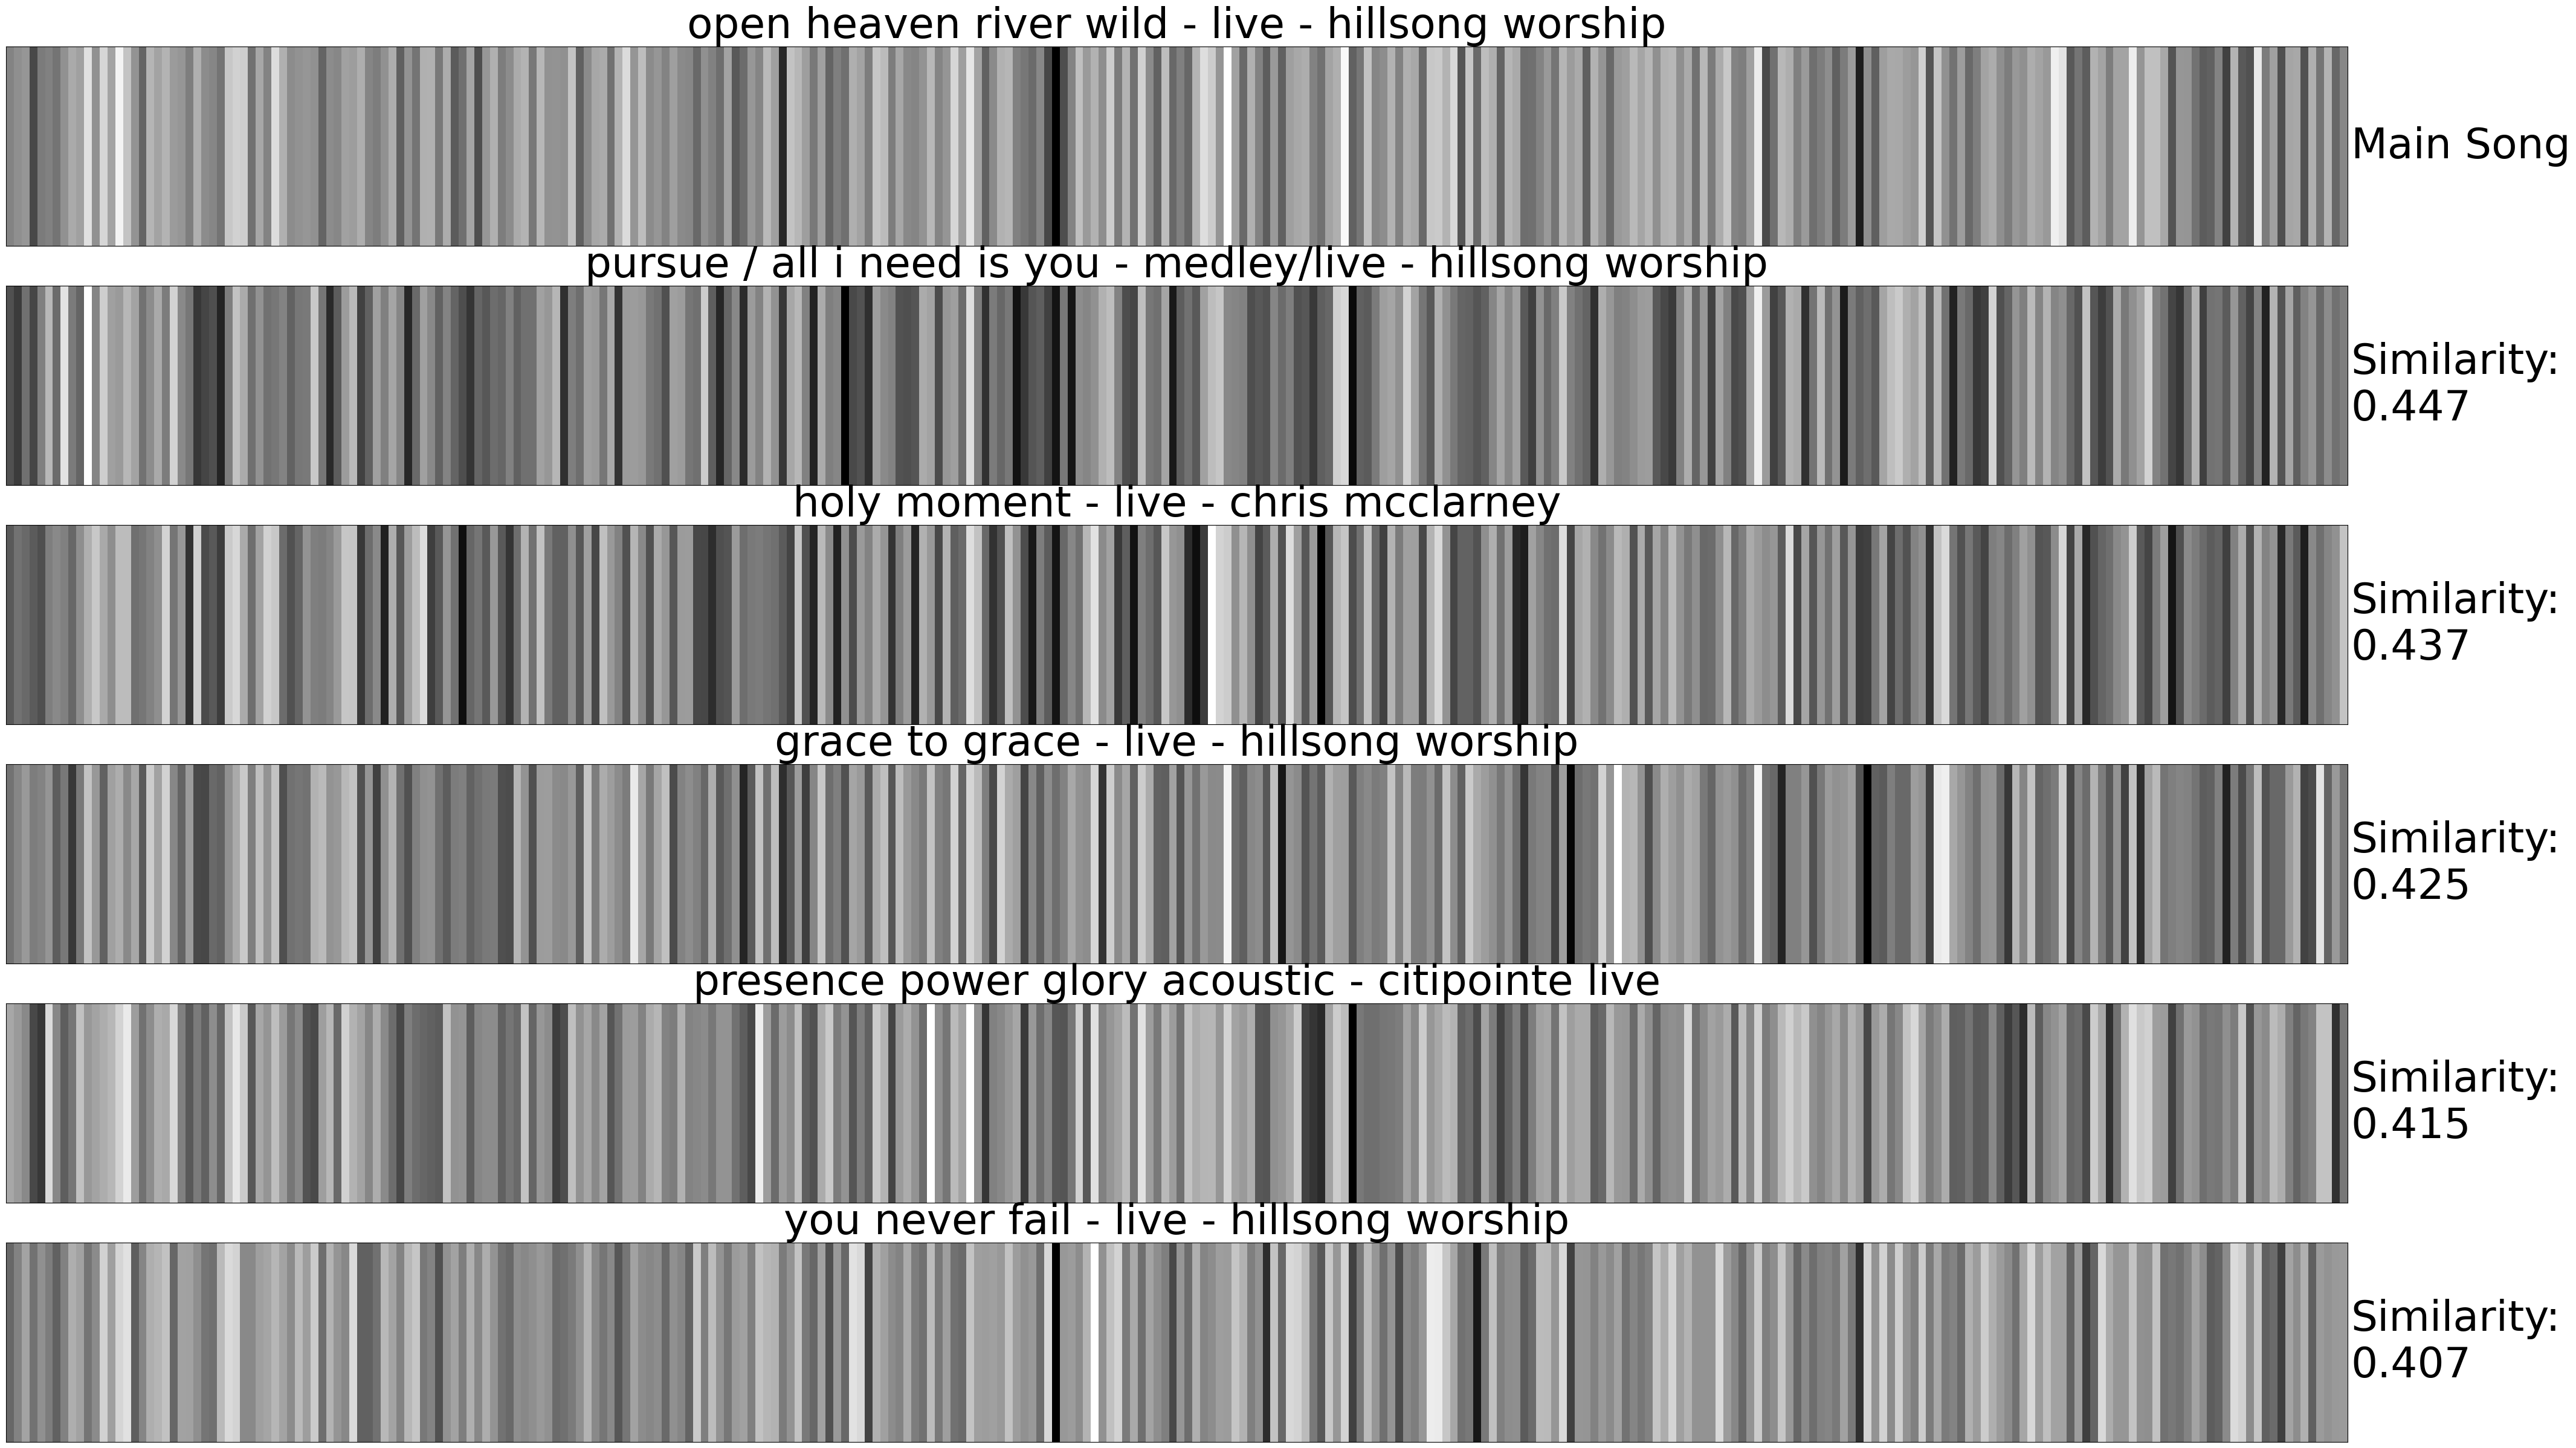

In [9]:
fig, axes = plt.subplots(6, 1, figsize = (50, 30))

slug = 4585
song_id_list = [(slug, "Main Song"), *[t for t in model.wv.most_similar(slug)[:5]]] 

for ax, (song_id, sim) in zip(axes.flat, song_id_list):
    ax.imshow([model.wv[song_id]], cmap = "binary", aspect = "auto")
    result = songs.loc[song_id, ['track_name', 'artist_name']]
    ax.set_title(result['track_name'] + ' - ' + result['artist_name'], fontsize = 50)
    ax.yaxis.set_label_position("right")
    ax.set_ylabel(f"Similarity:\n{sim:.3f}" if sim != song_id_list[0][1] else sim,
                  rotation = "horizontal", ha = "left", va = "center", fontsize = 50)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

# Clustering

In [3]:
def locate_optimal_elbow(x, y):
    # START AND FINAL POINTS
    p1 = (x[0], y[0])
    p2 = (x[-1], y[-1])
    
    # EQUATION OF LINE: y = mx + c
    m = (p2[1] - p1[1]) / (p2[0] - p1[0])
    c = (p2[1] - (m * p2[0]))
    
    # DISTANCE FROM EACH POINTS TO LINE mx - y + c = 0
    a, b = m, -1
    dist = np.array([abs(a*x0+b*y0+c)/math.sqrt(a**2+b**2) for x0, y0 in zip(x,y)])
    return x[np.argmax(dist)]

In [11]:
# Get the embedding matrix
embedding_matrix = model.wv[model.wv.index_to_key]
embedding_matrix.shape

(131858, 300)

In [12]:
range_k_clusters = (10, 101)    # adjust this for faster computation
km_list = []
for k in tqdm(range(*range_k_clusters, 10)):
    normalized_embedding_matrix = normalize(embedding_matrix)

    km = KMeans(n_clusters = k, n_init = 5, random_state = 666).fit(normalized_embedding_matrix)
    
    result_dict = {
        "k": k,
        "WCSS": km.inertia_,
        "km_object": km
    }
    
    km_list.append(result_dict)
km_df = pd.DataFrame(km_list).set_index('k')

  0%|          | 0/10 [00:03<?, ?it/s]


KeyboardInterrupt: 

In [22]:
pip show scikit-learn

Name: scikit-learn
Version: 1.5.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /home/hermann/.local/lib/python3.10/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Locate optimal elbow
with open('km_df.pkl', 'rb') as f:
    km_df = pickle.load(f)
k_opt = locate_optimal_elbow(km_df.index, km_df['WCSS'].values)
km_opt = km_df.loc[k_opt, 'km_object']
k_opt

70

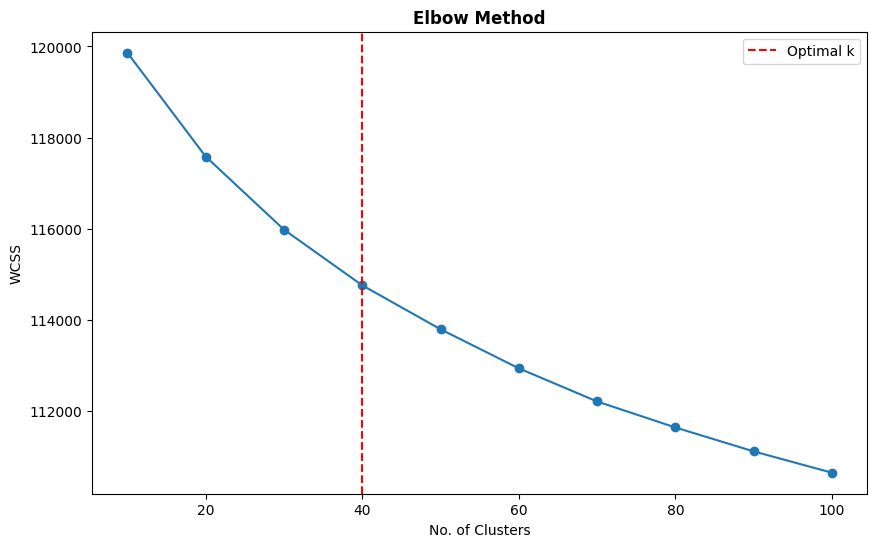

In [43]:
plt.figure(figsize=(10,6))
plt.plot(range(10,101,10), km_df['WCSS'].values, marker='o')
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method", fontweight = "bold")
plt.axvline(x=k_opt, linestyle='--', color='red', label='Optimal k')
plt.legend()
plt.show()

In [12]:
songs_cluster = dataset.copy()
songs_cluster.drop_duplicates(subset=['track_id'], inplace=True)
songs_cluster.set_index('track_id', inplace=True)
songs_cluster.head()

,playlist_id,playlist_name,track_name,track_uri,pos,artist_id,artist_name,artist_uri
track_id,,,,,,,,
1,967000,90's country,meet in the middle,7lUE02KHkZM44BZgjCaWRO,0,1,diamond rio,0svyIX7Xu3DVMkrOtB88i6
2,967000,90's country,love a little stronger,19WNVZ9WG2DvHJsPAx7qZM,1,1,diamond rio,0svyIX7Xu3DVMkrOtB88i6
3,967000,90's country,how your love makes me feel,0QOEdRACkh52czOmA9b8hi,2,1,diamond rio,0svyIX7Xu3DVMkrOtB88i6
4,967000,90's country,keeper of the stars - bonus track,5BSlukklfUTrmzmsuctmMr,3,2,tracy byrd,0xxJO75NeIAF5jYruLYIDT
5,967000,90's country,ten rounds with jose cuervo - recall mix,26J61MmE6YCWqIyROZdEgL,4,2,tracy byrd,0xxJO75NeIAF5jYruLYIDT


In [13]:
songs_cluster.loc[model.wv.index_to_key, 'cluster'] = km_opt.labels_
songs_cluster['cluster'] = songs_cluster['cluster'].fillna(-1).astype(int).astype('category')
songs_cluster.head()

,playlist_id,playlist_name,track_name,track_uri,pos,artist_id,artist_name,artist_uri,cluster
track_id,,,,,,,,,
1,967000,90's country,meet in the middle,7lUE02KHkZM44BZgjCaWRO,0,1,diamond rio,0svyIX7Xu3DVMkrOtB88i6,31
2,967000,90's country,love a little stronger,19WNVZ9WG2DvHJsPAx7qZM,1,1,diamond rio,0svyIX7Xu3DVMkrOtB88i6,31
3,967000,90's country,how your love makes me feel,0QOEdRACkh52czOmA9b8hi,2,1,diamond rio,0svyIX7Xu3DVMkrOtB88i6,31
4,967000,90's country,keeper of the stars - bonus track,5BSlukklfUTrmzmsuctmMr,3,2,tracy byrd,0xxJO75NeIAF5jYruLYIDT,31
5,967000,90's country,ten rounds with jose cuervo - recall mix,26J61MmE6YCWqIyROZdEgL,4,2,tracy byrd,0xxJO75NeIAF5jYruLYIDT,31


In [ ]:
# Visualization using t-SNE
embedding_tsne_full = TSNE(n_components=2, perplexity=k_opt//3, metric='cosine', random_state=666).fit_transform(embedding_matrix)

# Prepare DataFrame for plotting
songs_cluster.loc[model.wv.index_to_key, 'x'] = embedding_tsne_full[:,0]
songs_cluster.loc[model.wv.index_to_key, 'y'] = embedding_tsne_full[:,1]

# Plotting full t-SNE visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(data=songs_cluster[songs_cluster['cluster'] != -1], x='x', y='y', hue='cluster', palette='viridis', legend=False)
plt.title(f't-SNE Visualization of {k_opt} Song Clusters', fontweight='bold')
plt.savefig(f'figures/full-tsne_{model_timestamp}.png')


# Step 2: Perform t-SNE on a random subset of clusters
# Randomly select 10 unique clusters
random.seed(100)
random_cluster2plot = random.sample(range(k_opt), 10)
random_songs = songs_cluster[songs_cluster.cluster.isin(random_cluster2plot)].copy()
random_tsne = TSNE(n_components = 2, perplexity=k_opt//3, metric = 'cosine', random_state = 100).fit_transform(model.wv[random_songs.index])
random_songs.loc[random_songs.index, 'x'] = random_tsne[:,0]
random_songs.loc[random_songs.index, 'y'] = random_tsne[:,1]

plt.figure(figsize=(12, 8))
sns.scatterplot(data = random_songs, x = 'x', y = 'y', palette = "viridis",hue = 'cluster')
plt.title(f"Randomly selected {len(random_cluster2plot)} Song Clusters", fontweight = "bold")
plt.savefig(f'figures/selected-tsne_{model_timestamp}.png')

# Recommending

In [16]:
def meanVectors(playlist):
    vec = []
    for song_id in playlist:
        try:
            vec.append(model.wv[song_id])
        except KeyError:
            continue
    if len(vec) > 0:
        return np.mean(vec, axis=0)
    else:
        return np.zeros(model.vector_size)
    
with open(SRC_FOLDER + 'test.pkl', 'rb') as f:
    playlist_test = pickle.load(f)
playlist_vec = list(map(meanVectors, playlist_test))

In [17]:
songs = dataset.copy()
songs.drop_duplicates(subset=['track_id'], inplace=True)
songs.set_index('track_id', inplace=True)
# Crea una colonna booleana che indica se la canzone è presente nel vocabolario
songs['in_vocab'] = songs.index.isin(model.wv.index_to_key)

In [18]:
def similarSongsByVector(vec, n = 10, by_name = True):
    # extract most similar songs for the input vector
    similar_songs = model.wv.similar_by_vector(vec, topn = n)
    
    # extract name and similarity score of the similar products
    if by_name:
        similar_songs = [(songs.loc[song_id, ['track_name', 'artist_name']], sim)
                              for song_id, sim in similar_songs]
    
    return similar_songs

In [19]:
def print_recommended_songs(idx, n):
    print("============================")
    print("SONGS PLAYLIST")
    print("============================")
    for song_id in playlist_test[idx]:
        print(songs.loc[song_id, ['track_name', 'artist_name']])
    print()
    print("============================")
    print(f"TOP {n} RECOMMENDED SONGS")
    print("============================")
    for song, sim in similarSongsByVector(playlist_vec[idx], n):
        print(f"[Similarity: {sim:.3f}] {song}")
    print("============================")

In [20]:
print_recommended_songs(899, n=10)

SONGS PLAYLIST
track_name            in the end
artist_name    black veil brides
Name: 7693, dtype: object
track_name             true friends
artist_name    bring me the horizon
Name: 26379, dtype: object
track_name                    drown
artist_name    bring me the horizon
Name: 7717, dtype: object
track_name       rebel love song
artist_name    black veil brides
Name: 172858, dtype: object
track_name     headstrong
artist_name         trapt
Name: 6099, dtype: object
track_name               happy song
artist_name    bring me the horizon
Name: 45252, dtype: object
track_name     welcome to the black parade
artist_name            my chemical romance
Name: 11620, dtype: object
track_name        back to me
artist_name    of mice & men
Name: 56409, dtype: object

TOP 10 RECOMMENDED SONGS
[Similarity: 0.622] track_name     welcome to the black parade
artist_name            my chemical romance
Name: 11620, dtype: object
[Similarity: 0.605] track_name                    drown
artist_name 

#  Valutazione

In [21]:
top_n_songs = 25

## Random Recommender

In [22]:
#mo famo hitrate
#quindi prima random
def hit_rate_random(playlist, n_songs):
    hit = 0
    for i, target in enumerate(playlist):
        random.seed(i)
        recommended_songs = random.sample(list(songs.index), n_songs)
        hit += int(target in recommended_songs)
    return hit/len(playlist)

In [20]:
eval_random = pd.Series([hit_rate_random(p, n_songs = top_n_songs)
                         for p in tqdm(playlist_test, position=0, leave=True)])
eval_random.mean()

100%|██████████| 1000/1000 [37:17<00:00,  2.24s/it]


5.055065504462654e-05

## Cluster Recommender

1. Identificare quale numero di cluster è il più frequente (attraverso la maggioranza) tra le canzoni circostanti. La distanza massima tra la canzone **LOO** e le canzoni di contesto è definita dalla `windows`.
2. Elencare le possibili canzoni appartenenti al cluster di maggioranza.
3. Prendere $n$ canzoni casualmente dalla lista delle canzoni possibili.

In [94]:
def hitRateClustering(playlist, window, n_songs):
    hit = 0
    context_target_list = [([playlist[w] for w in range(idx-window, idx+window+1)
                             if not(w < 0 or w == idx or w >= len(playlist))], target)
                           for idx, target in enumerate(playlist)]
    for context, target in context_target_list:
        vectors = [model.wv[c].astype('float64') for c in context if c in model.wv.index_to_key]
        if len(vectors) == 0: continue
        km_opt.cluster_centers_ = km_opt.cluster_centers_.astype(float)
        cluster_numbers = km_opt.predict(vectors)
        majority_voting = stats.mode(cluster_numbers).mode[0]
        possible_songs_id = list(songs_cluster[songs_cluster['cluster'] == majority_voting].index)
        recommended_songs = random.sample(possible_songs_id, n_songs)
        songs_id = recommended_songs
        hit += int(target in songs_id)
    return hit/len(playlist)

In [95]:
eval_clust = pd.Series([hitRateClustering(p, model.window, n_songs = top_n_songs)
                           for p in tqdm(playlist_test, position=0, leave=True)])
eval_clust.mean()

100%|██████████| 1000/1000 [08:41<00:00,  1.92it/s]


0.005352545908715444

## Word2Vec Recommender

In [115]:
def hitRateSong2Vec(playlist, window, n_songs):
    hit = 0
    context_target_list = [([playlist[w] for w in range(idx-window, idx+window+1)
                             if not(w < 0 or w == idx or w >= len(playlist))], target)
                           for idx, target in enumerate(playlist)]
    for context, target in context_target_list:
        context_vector = meanVectors(context)
        recommended_songs = similarSongsByVector(context_vector, n = n_songs, by_name = False) 
        songs_id = list(zip(*recommended_songs))[0]
        hit += int(target in songs_id)
    return hit/len(playlist)

In [116]:
eval_song2vec = pd.Series([hitRateSong2Vec(p, model.window, n_songs = top_n_songs)
                           for p in tqdm(playlist_test, position=0, leave=True)])
eval_song2vec.mean()

100%|██████████| 1000/1000 [30:32<00:00,  1.83s/it]   


0.11326859198621564

## Comparison

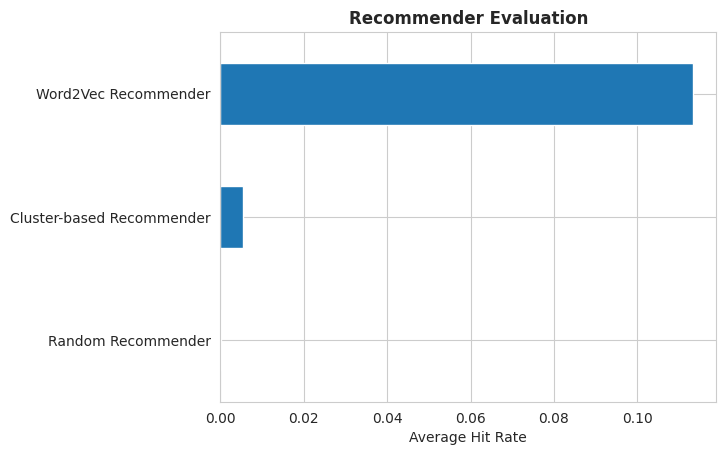

In [96]:
eval_df = pd.DataFrame({
    "Random Recommender": [5.055065504462654e-05],
    "Cluster-based Recommender": [0.005352545908715444],
    "Word2Vec Recommender": [0.11326859198621564]
})

g = eval_df.mean().sort_values().plot(kind='barh')
g.set_xlabel("Average Hit Rate")
g.set_title("Recommender Evaluation", fontweight="bold")
plt.show()
plt.savefig("figures/recommender-evaluation.png")